Team Members
* Shikhar Das- 10582344
* Karishma Ashok Punjabi-10596310
* Manoj Kamble- 10600303
* Anjana Palakkaparampil Sasi - 10583381 

# **Task 2**

Neural Network

* Importing Library Tensorflow and Keras. Tensorflow is an open-source software library used for Machine Learning and Artificial Intelligence. 
* In this task we are using tensorflow to implement Artificial Neural Network to Classify sign-mnist dataset. We are also using keras to build and train our model.  

In [1]:

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Imported dataset using pandas

In [2]:

df = pd.read_csv("/content/sign_mnist.csv")
df.head(5)
df.shape

(10000, 785)

In [4]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Dropped label column and stored it in X variable.

Storing label in y variable(Dependent variable)

In [8]:
df.duplicated().sum()

0

In [9]:
y = df['label']
X = df.drop('label',axis=1)
len(y)

10000

* We extracted and stored pixel values for each row. Converted into binary form. 
* Created an array where each row represents an image
* Using matplotlib to visualize it.

3

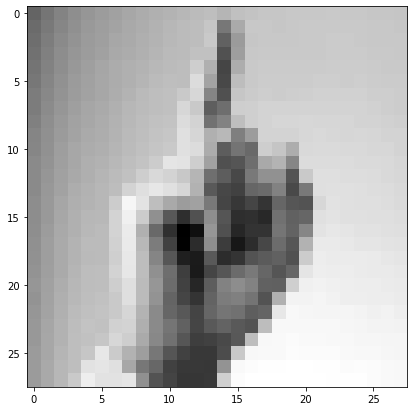

In [10]:
plt.figure(figsize=(7,7))
some_digit=0
some_digit_image = X.iloc[some_digit].to_numpy().reshape(28,28)
plt.imshow(np.reshape(some_digit_image,(28,28)),cmap = plt.cm.gray)
some_digit_image.shape
y[0]

* Visualized dependent variable to showcase our dependent variable is balaned or not.
* We have done this using Seaborn library.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


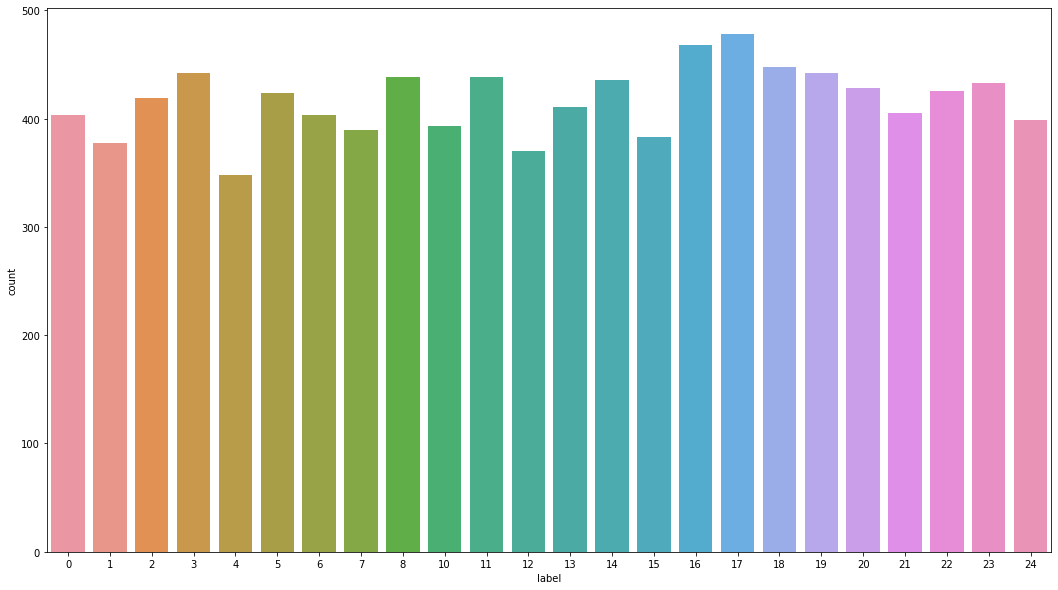

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(df['label'])

Splitted our data into train and test. 80% training and 20% testing.

Normalized dataset using Standard Scaler.

In [12]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=123)


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
print(X_test.shape)
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.shape
# print(X_train.dtype)



(2000, 784)


(8000, 784)

Designed and Fitted model using ANN. We have added two dense layer where 1 layer has 500 neuron and 2 has 100 neuron. Output layer has 25 neuron Activation functions used are relu and softmax.

Compiled model and used optimizer adam and loss sparse_categorical_crossentropy



In [13]:

model = keras.Sequential([
  keras.layers.Dense(500,input_shape=(784,),activation = 'relu'),
  keras.layers.Dense(100,activation ='relu'),
  keras.layers.Dense(25,activation ='softmax')
  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.summary()

model.fit(X_train, y_train, epochs=5, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 445,125
Trainable params: 445,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
250/250 [==============================] - 2s 5ms/step - loss: 0.8831 - accuracy: 0.7479
Epoch 2/5
250/250 [==============================] - 1s 6ms/step - loss: 0.1409 - accuracy: 0.9653
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 0.1234 - accuracy: 0.9655
Epoch 4/5
250/250

Evaluated model Accuracy

In [14]:
model.evaluate(X_train,y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.0611 - accuracy: 0.9825


[0.06109299138188362, 0.9825000166893005]

In [15]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.0824 - accuracy: 0.9755


[0.08237964659929276, 0.9754999876022339]

In [16]:
y_pred = model.predict(X_test)
np.argmax(y_pred[1])

23

In [17]:
y_pred_label = [ np.argmax(i) for i in y_pred]
y_pred_label[:5]

[2, 23, 11, 16, 5]

In [18]:
y_test[:5]

array([ 2, 23, 11, 16,  5])

Printing Confusion Matrix

In [19]:
tf.math.confusion_matrix(labels=y_test,predictions = y_pred_label)

<tf.Tensor: shape=(25, 25), dtype=int32, numpy=
array([[77,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 91,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 89,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 65,  0,  0,  0,  0,  0,  0,  0,  3,  1,  0,  0,
         0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 90,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 81,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 75,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 

KNN Algo

It is the simplest classification algorithm which is used to predict new data based on previous data. It just takes into account the data that is closest to it. It checks the euclidiean distance between its neighbour.This enhance accuracy as it checks the distance between self and its nearby neighbour. Moreover it will also check the shortest path and handle it properly once it have been determined.
 The Knn classified is suitable option because it grately reduces overfitting.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
df1 = df['label']
df2 = df.drop('label',axis=1)
df1 = df1.to_numpy()
df2 = df.to_numpy()

In [29]:
from sklearn.model_selection import train_test_split as tests
X_train,X_test,y_train,y_test = tts(df2,df1,test_size=0.3,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.fit_transform(X_test)

Fitted model using knn, metric minkowski defines we have taken euclidian distance between two data points. 

In [59]:
clf = KNeighborsClassifier(n_neighbors=15,weights='uniform',metric='minkowski')
clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

Checked the accuracy of model

In [60]:
clf.score(X_train,y_train)

0.920625

In [61]:
clf.score(X_test,y_test)

0.8835

In [62]:
y_test[:5]

5876     0
6555     0
1448    13
3351    19
231     14
Name: label, dtype: int64

In [63]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([ 0,  0, 13, 19, 14])

Confusion Matric

In [64]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred)

Visualized the confusion matrix using seaborn library.

Text(141.0, 0.5, 'True')

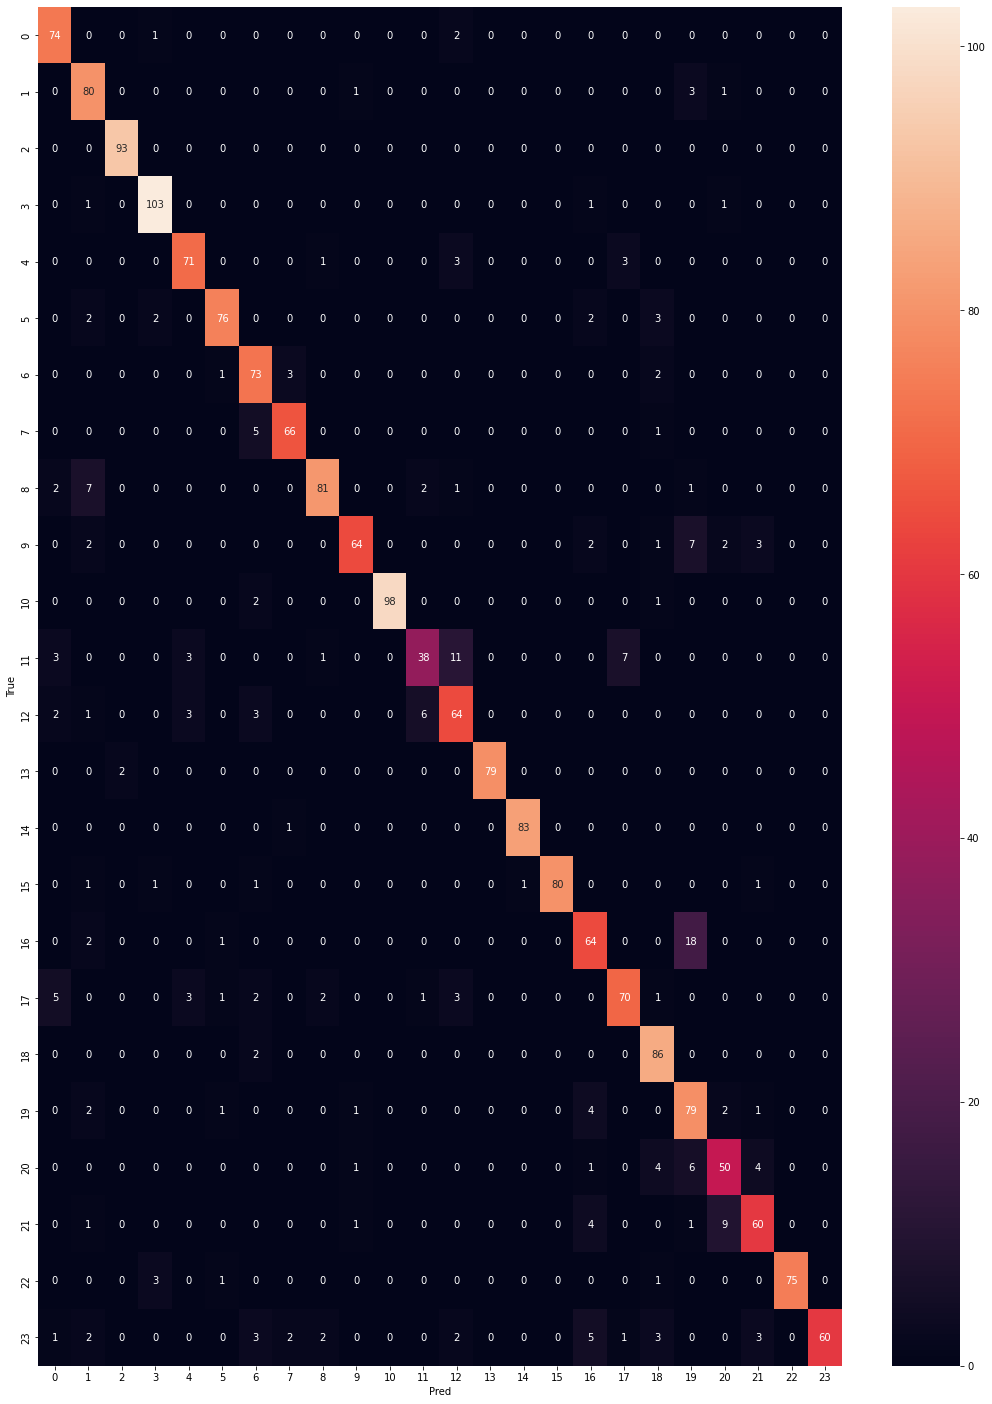

In [65]:

plt.figure(figsize=(18,25))
sns.heatmap(cmat,annot=True,fmt="d")
plt.xlabel('Pred')
plt.ylabel('True')

K-Fold Cross Validation

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model2= KNeighborsClassifier(n_neighbors=50,weights='uniform',metric='minkowski')
results_kfold = cross_val_score(model2, X_train, y_train, cv=kfold)
print(results_kfold)
print('Accuracy with 10 fold cross validation: ',results_kfold.mean()*100.0)

[0.735   0.70625 0.69875 0.6975  0.73125 0.70625 0.6975  0.705   0.7
 0.6825 ]
Accuracy with 10 fold cross validation:  70.60000000000001


SVM Algo

* Support Vector Machine is classification algorithm but can also be used as regression.
The support vector machine algorithm's goal is to find a hyperplane in * an N-dimensional space (N — the number of features) that distinguishes between data points.

* Imported svm classifier from sklearn.
* Used GridSearchCV for hyperparameter tuning.

In [40]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [41]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Splitted model into train and test set.
Fitted model with svm classifier.

In [42]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y,random_state=123,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = svm.SVC(kernel = 'poly',random_state=123)

In [43]:
model.fit(X_train,y_train)

SVC(kernel='poly', random_state=123)

Checked Accuracy of model

In [44]:
model.score(X_train,y_train)

0.904875

In [45]:
model.score(X_test,y_test)

0.873

In [46]:
y_pred = model.predict(X_test)

Defining gridsearch Parameters and choosing kernel rbf,linear,poly, sigmoid

In [ ]:

gridsr = GridSearchCV(svm.SVC(gamma ='auto'),{
    'C':[1,10,20,.01,.001],
    'kernel': ['rbf','linear','poly','sigmoid'],

},cv=5)

Fitted traing data in GridSearch

In [ ]:
gridsr.fit(X_train,y_train)

Found the best parameters

In [ ]:
gridsr.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
gridsr.score(X_train,y_train)

1.0

K-Fold Cross Validation

Cross validated model using 10 k-fold

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model2= svm.SVC(kernel = 'poly',random_state=123)
results_kfold = cross_val_score(model2, X_train, y_train, cv=kfold)
print(results_kfold)
print('Accuracy with 10 fold cross validation: ',results_kfold.mean()*100.0)

[0.8775  0.87125 0.8475  0.8225  0.865   0.86125 0.8325  0.855   0.8675
 0.83125]
Accuracy with 10 fold cross validation:  85.3125


Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[66,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         3,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  6,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 69,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  6,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 72,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         4,  0,  2, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0,  0,  0,  4,  0,  0,  0,  0,  0,
         1,  0, 10,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 68,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  6,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 84,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

**Decision Tree Classifier**


Utilized StandarScaler() to normalize the data to ensure that various features have a similar range of values.

Also splitted data into 80-20 ratio using sklearn package

In [49]:
df = pd.read_csv("/content/sign_mnist.csv")

In [50]:
y = df['label']
X = df.drop('label',axis=1)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [52]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

The decision tree's maximum depth is set to 10 in the parameter.

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf=clf.fit(X_train, y_train)

In [54]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [55]:
from sklearn.metrics import accuracy_score

print("accuracy of the decision tree model is:\nTest" , accuracy_score(y_test, y_pred_dt, normalize=True,sample_weight=None))
print('Train', accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the decision tree model is:
Test 0.5445
Train 0.66575


Conclusion
The maximum accuracy obtained is 0.934 and is ANN  algorithm.
Second Highest accuracy is of KNN 0.88. 3 is SVM 0.87. Lowest accuracy are of descision tree classifier as 0.54.

Hence in this senerio we can conclude that ANN is ideal algorithm.